<center><strong><font color="#ec6969" style="font-size:30px;"> Proyecto 3 IA </font></strong></center>
<br>
<br>

___
<center>
<br>
Alejandro Uscátegui Torres <br> 
Javier Santana <br>
David Pérez <br>
Santiago Barajas
</center>
<br>

___


In [180]:
# import platform

# print("Sistema Operativo:", platform.system())
# print("Nombre del nodo:", platform.node())
# print("Versión del Sistema Operativo:", platform.version())
# print("Tipo de Máquina:", platform.machine())
# print("Procesador:", platform.processor())
# print("Versión de Python:", platform.python_version())

"""_summary_
    
    Sistema Operativo: Windows
    Nombre del nodo: UscateguiTorres
    Versión del Sistema Operativo: 10.0.22631
    Tipo de Máquina: AMD64
    Procesador: Intel64 Family 6 Model 167 Stepping 1, GenuineIntel
    Versión de Python: 3.11.5
    
"""

'_summary_\n    \n    Sistema Operativo: Windows\n    Nombre del nodo: UscateguiTorres\n    Versión del Sistema Operativo: 10.0.22631\n    Tipo de Máquina: AMD64\n    Procesador: Intel64 Family 6 Model 167 Stepping 1, GenuineIntel\n    Versión de Python: 3.11.5\n    \n'

<strong><font color="#2e53b1" style="font-size:30px;"> Parte 1: Modelo De Red Bayesiana </font></strong>

---

**Contexto:**

*Una red Bayesiana es un modelo probabilístico que representa un conjunto de variables y sus dependencias condicionales a través de un gráfico dirigido acíclico (DAG). En este gráfico, los nodos representan variables y las aristas representan relaciones de dependencia directa entre estas variables. Cada nodo tiene una tabla de probabilidad condicional que cuantifica las probabilidades de la variable dadso sus padres en el gráfico.*

*Las redes bayesianas permiten modelar la incertidumbre y pueden ser usadas para realizar inferencias sobre el valor de una variable basándose en el conocimiento de otras.*

Son útiles en el contexto de clasificación, predicción, decisión y diagnosis. Además están basadas en el teorema de Bayes, que como premisa indica que podemos actualizar nuestras creencias sobre un evento basados en nueva información


<strong><font color="#54c38c" style="font-size:20px;"> Desarrollo </font></strong>

---

In [181]:
# Recibimos el nombre de cada nodo y su ubicación desde un archivo json

import json

nodos: dict[str, str] = {}

lista_de_nodos = []

# with open("data/monty_hall/nodos.json") as file:
#     nodos = json.load(file)
    
# with open("data/ejemplo_clase/nodos.json") as file:
#     nodos = json.load(file)

with open("data/ejemplo_final/nodos.json") as file:
    nodos = json.load(file)

lista_de_nodos = list(nodos.keys())
# Print the dictionary
# intento de flex
# print(list(map(lambda x: print(f"nombre nodo: {x} \n tabla del nodo: {nodos[x]}"), nodos)))

for nodo in nodos:
    print(f"Nombre del nodo: {nodo} ")
    print(f"Tabla del nodo: {nodos[nodo][0]}")
    print(f"Depende de: {nodos[nodo][1]}")
    print(f"Apunta a: {nodos[nodo][2]}")
    print(f"nombre estados: {nodos[nodo][3]}")
    print()

Nombre del nodo: D 
Tabla del nodo: data/ejemplo_final/difficulty.csv
Depende de: []
Apunta a: ['G']
nombre estados: ['easy: 0', 'hard: 1']

Nombre del nodo: I 
Tabla del nodo: data/ejemplo_final/intelligence.csv
Depende de: []
Apunta a: ['G', 'S']
nombre estados: ['low: 0', 'high: 1']

Nombre del nodo: E 
Tabla del nodo: data/ejemplo_final/ebrioxd.csv
Depende de: []
Apunta a: ['G']
nombre estados: ['no: 0', 'yes: 1']

Nombre del nodo: G 
Tabla del nodo: data/ejemplo_final/grade.csv
Depende de: ['I', 'D', 'E']
Apunta a: ['L']
nombre estados: ['A: 0', 'B: 1', 'C: 3']

Nombre del nodo: S 
Tabla del nodo: data/ejemplo_final/SAT.csv
Depende de: ['I']
Apunta a: []
nombre estados: ['bad: 0', 'good: 1']

Nombre del nodo: L 
Tabla del nodo: data/ejemplo_final/letter.csv
Depende de: ['G']
Apunta a: []
nombre estados: ['bad: 0', 'good: 1']



In [182]:
def crear_tuplas():
    tuplas_aristas_grafo : list[tuple[str,str]] = []
    for nodo in nodos:
        for arista in nodos[nodo][2]:
            tuplas_aristas_grafo.append((nodo, arista))    
    return tuplas_aristas_grafo

In [183]:
# Dependencia necesaria para crear la red Bayesiana
from pgmpy.models import BayesianNetwork

# Se indican las tuplas que componen a la red bayesiana con formato: (origen,destino) dentro de una lista:
tupla_aristas_dirigidas = crear_tuplas()
print(tupla_aristas_dirigidas)

# Se crea el modelo con base a la tupla (no tocar xd)
model = BayesianNetwork(tupla_aristas_dirigidas)

[('D', 'G'), ('I', 'G'), ('I', 'S'), ('E', 'G'), ('G', 'L')]


In [184]:
import pandas as pd

# Función que lee CSVs completos desde la cabecera

def leer_csv(ruta_archivo) -> list[list[float]]:
    df = pd.read_csv(ruta_archivo, header=None)
    return df.values.tolist()


In [185]:

from pgmpy.factors.discrete import TabularCPD

# Se crean las Tablas de Probabilidad Condicional (CPD -> Conditional Probability Distribution) para cada nodo
# Lee los archivos y los carga como grafo

for nodo in nodos:
    
    tabla_nodo = leer_csv(nodos[nodo][0])
    nodos_nombre_estado: dict[list[str]] = {}
    nodos_nombre_estado[nodo] = nodos[nodo][3]
    
    # print(tabla_nodo)
    
    if len(nodos[nodo][1]) != 0:
        # Tomo los nodos de los que existe dependencia
        nodos_fuente: list[str] = []
        
        
        for nodo_fuente in nodos[nodo][1]:
            nodos_fuente.append(
                len(leer_csv(nodos[nodo_fuente][0]))
            )
            nodos_nombre_estado[nodo_fuente] = nodos[nodo_fuente][3]
            
        # print(nodos[nodo][1])
        # print(nodos_fuente)
        
        cpd = TabularCPD(
            variable=nodo, 
            variable_card=len(tabla_nodo),
            values= tabla_nodo, 
            evidence=nodos[nodo][1], 
            evidence_card=nodos_fuente,
            state_names=nodos_nombre_estado
            )
        
        model.add_cpds(cpd)
        
    else:
        cpd = TabularCPD(
            variable=nodo, 
            variable_card=len(tabla_nodo),
            values=tabla_nodo,
            state_names=nodos_nombre_estado
            )
        model.add_cpds(cpd)
        
model.get_cpds()

[<TabularCPD representing P(D:2) at 0x29e91f5b610>,
 <TabularCPD representing P(I:2) at 0x29e91edc390>,
 <TabularCPD representing P(E:2) at 0x29e91f531d0>,
 <TabularCPD representing P(G:3 | I:2, D:2, E:2) at 0x29e91ee1ad0>,
 <TabularCPD representing P(S:2 | I:2) at 0x29e91f50fd0>,
 <TabularCPD representing P(L:2 | G:3) at 0x29e91f50650>]

In [186]:
# check_model check for the model structure and the associated CPD and returns True if everything is correct otherwise throws an exception
model.check_model()

True

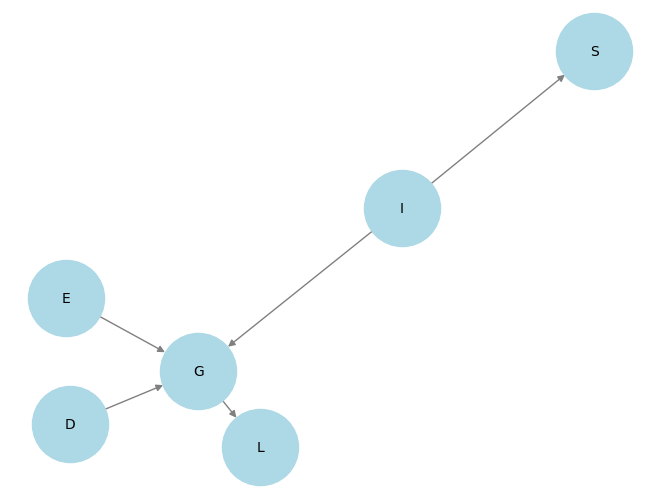

In [187]:
import networkx as nx
import matplotlib.pyplot as plt

# Creamos un grafo dirigido
G = nx.DiGraph()

# Generamos las tuplas a partir 
G.add_edges_from(tupla_aristas_dirigidas)

# Dibujar el grafo
nx.draw(G, with_labels=True, node_color="lightblue", edge_color="gray", node_size=3000, font_size=10)

# Mostrar el grafo
plt.box(False) 
plt.show()

In [188]:
# También es posible ver cada una de las tablas si el usuario desea comprobar que tengan sentido con un método visual
# y en caso de que el check permita que sucedan cosas raras:

for cpd in model.get_cpds():
    print(cpd)
    
# print(model.get_cpds('T').values[0][2][1])

+------------+-----+
| D(easy: 0) | 0.6 |
+------------+-----+
| D(hard: 1) | 0.4 |
+------------+-----+
+------------+-----+
| I(low: 0)  | 0.7 |
+------------+-----+
| I(high: 1) | 0.3 |
+------------+-----+
+-----------+------+
| E(no: 0)  | 0.99 |
+-----------+------+
| E(yes: 1) | 0.01 |
+-----------+------+
+---------+------------+------------+-----+------------+------------+
| I       | I(low: 0)  | I(low: 0)  | ... | I(high: 1) | I(high: 1) |
+---------+------------+------------+-----+------------+------------+
| D       | D(easy: 0) | D(easy: 0) | ... | D(hard: 1) | D(hard: 1) |
+---------+------------+------------+-----+------------+------------+
| E       | E(no: 0)   | E(yes: 1)  | ... | E(no: 0)   | E(yes: 1)  |
+---------+------------+------------+-----+------------+------------+
| G(A: 0) | 0.1        | 0.05       | ... | 0.7        | 0.6        |
+---------+------------+------------+-----+------------+------------+
| G(B: 1) | 0.1        | 0.05       | ... | 0.2        

<strong><font color="#2e53b1" style="font-size:30px;"> Parte 2: Motor de inferencia por enumeración </font></strong>

---

**Contexto:**

*Un motor de inferencia por enumeración es una técnica utilizada en redes bayesianas para calcular probabilidades exactas de eventos específicos. Este enfoque implica enumerar y sumar todas las posibles configuraciones de las variables de una red bayesiana que cumplen con las condiciones especificadas.*

In [189]:
"""_summary_

    Para nuestro código usamos la librería pgmpy que nos permite hacer todas las operaciones necesarias para trabajar con redes bayesianas. Y decidimos utilizar el método de BeliefPropagation
    el cual no es más que un tipo de inferencia usada para calcular la probabilidad de un nodo dado un conjunto de valores de evidencia.
    Sin embargo, también es posible utilizar VariableElimination, que es un método de inferencia que calcula la probabilidad de un nodo dado un conjunto de valores de evidencia también.
    y para hacer esto sólo se debe cambiar la siguiente línea:
    
    infer = BeliefPropagation(model) -> infer = VariableElimination(model)
"""

# Motor de inferencia por enumeración
# from pgmpy.inference import VariableElimination
from pgmpy.inference import BeliefPropagation
from pgmpy.inference import VariableElimination

infer = VariableElimination(model)

In [190]:
# model.active_trail_nodes('D', observed='G')

<strong><font color="#2e53b1" style="font-size:30px;"> Configuración del usuario al correr el programa </font></strong>

In [191]:

"""_summary_

    Método automatizado: La librería se encarga de generar la solución para cada caso dada la evidencia
    En nuestro caso, sirve para comprobar que los resultados que tengamos son correctos
    
"""

# Validación

# Caso general
# print(lista_de_nodos)
# probabilidades_bayesianas = infer.query(lista_de_nodos, evidence={}, joint=True)

# Caso particular
# Para nuestro ejemplo inventado, queremos saber si la persona logró el GRADE de un examen difícil y siendo inteligente

lista_de_nodos_especificos = ['G']
probabilidades_bayesianas = infer.query(lista_de_nodos_especificos, evidence={'D': 'hard: 1', 'E': 'yes: 1'}, joint=True)

# Posibles combinaciones
print(probabilidades_bayesianas)

+---------+----------+
| G       |   phi(G) |
+=========+==========+
| G(A: 0) |   0.1870 |
+---------+----------+
| G(B: 1) |   0.0970 |
+---------+----------+
| G(C: 3) |   0.7160 |
+---------+----------+


In [192]:
"""
    _summary_:
    
    Método manual:
    
    1. Se indica la variable objetivo
    2. Se indican las variables evidencia
    3. Se buscan las variables ocultas
    4. Se realiza la normalización

"""
# Pasos 1 y 2

variable_objetivo = 'G'
variable_evidencia = {'D': 1, 'E': 1}
nodos_iniciales = ['G', 'D', 'E']

formula_inicial = f"Fórmula inicial: P ( {variable_objetivo} | {variable_evidencia})"
formula_derivada_original = f"Fórmula derivada: α P({' ∧ '.join(nodos_iniciales)})"



# Ejemplo básico con variables conjuntas
# print(probabilidades_bayesianas.values[1][1][1][1])

# Ejemplo con inferencia
# print(probabilidades_bayesianas.values[0][1][1])

In [193]:
from collections import deque

def encontrar_dependencias(target, nodos_funcion=nodos):
    # Se buscan las variables ocultas, con base a las dependencias
    dependencias = set()
    stack = [target]
    
    while stack:
        actual = stack.pop()
        # Se revisan los nodos padres del nodo actual
        for parent in nodos_funcion[actual][1]:
            # Si el nodo actual tiene un padre, y no está en la variable de dependencias
            # se agregará a la pila y al conjunto de dependencias
            if parent not in dependencias:
                dependencias.add(parent)
                stack.append(parent)
    
    return dependencias

def traverse_independent_to_target(independents, target, nodos_funcion=nodos):
    queue = deque(independents)
    visited = set()
    result = []
    
    while queue:
        current = queue.popleft()
        if current not in visited:
            visited.add(current)
            result.append(current)
            for child in nodos_funcion[current][2]:
                queue.append(child)
    
    if target in result:
        target_index = result.index(target)
        return result[:target_index + 1]
    else:
        return None

def valor_recorrido(nodos_recorrido, valores_evidencia,nodos_funcion=nodos):
    # Se busca el valor de la probabilidad conjunta
    probabilidad_conjunta = 1
    for nodo in nodos_recorrido:
        padres = nodos_funcion[nodo][1]
        if padres == []:
            probabilidad_conjunta *= model.get_cpds(nodo).values[valores_evidencia[nodo]]
            print(f"P( {nodo} = {valores_evidencia[nodo]} )", end=" ")
        else:
            # Con base a los padres, accedo al nodo
            aux = model.get_cpds(nodo).values[valores_evidencia[nodo]]
            for padre in padres:
                # print(padre)
                aux = aux[valores_evidencia[padre]] 
            # print(aux)
            print(f"P( {nodo} = {valores_evidencia[nodo]} | {', '.join(padres)} )", end=" ")
            probabilidad_conjunta *= aux
    print('+', end=" ")
    return probabilidad_conjunta

def normalizacion(lista_para_operar):
    # Se realiza la normalización
    suma = sum(lista_para_operar)
    alfa = 1/suma
    print(f'la suma es = {suma}')
    print(f'alfa es = {alfa}')
    resultado = list(map(lambda x: x * alfa, lista_para_operar))
    return resultado

In [194]:
# Generamos los nodos invisibles

dependencias = list(encontrar_dependencias(variable_objetivo))

nodos_invisibles = list(set(dependencias)\
    .symmetric_difference(set(nodos_iniciales))\
    .symmetric_difference(set(variable_objetivo)))

print(nodos_invisibles)

['I']


In [195]:
# BLOQUE DE TRAZABILIDAD

for dependencia in dependencias:
    if dependencia not in nodos_iniciales:
        nodos_iniciales.append(dependencia)

# Formula para traza
formula_derivada_variables_ocultas = f"Fórmula derivada: α ∑ P({' ∧ '.join(nodos_iniciales)})"


In [196]:
# Se genera el recorrido que se va a realizar

# Una vez conocidas todas las dependencias, revisamos que nodos son totalmente independientes
nodos_independientes = []
for dependencia in dependencias:
    if nodos[dependencia][1] == []:
        nodos_independientes.append(dependencia)

# Generamos el recorrido desde los nodos independientes hasta el objetivo
recorrido = traverse_independent_to_target(nodos_independientes, variable_objetivo)

In [197]:
# El recorrido puede hacerse con dos bucles:
# el primer bucle recorre revisa los estados de la variable objetivo para hacer los cálculos
# De modo que un estado es fijo en cada recorrido
# el segundo bucle tiene en cuenta las variables invisibles, y también les genera un estado fijo
# en cada recorrido
# el tercer bucle usa los valores de las variables ya existentes

# print(model.get_cpds(variable_objetivo).variable_card)

n_estados_var_objetivo = model.get_cpds(variable_objetivo).variable_card



resultados_estados = []
for estado_var_objetivo in range(n_estados_var_objetivo):
    # Puedo ejecutar estado de la variable objetivo
    # print(estado)
    
    # Resultados finales
    resultado_estado = 0
    
    # Accedo a los nodos invisibles
    for nodo_invicible in nodos_invisibles:
        # Accedo a los estados de los nodos invisibles
        # print(nodos_invisibles)
        for estado_var_invisible in range(model.get_cpds(nodo_invicible).variable_card):
            # Puedo ejecutar estado de la variable invisible
            # print(estado_var_invisible)
            variable_evidencia[variable_objetivo] = estado_var_objetivo
            variable_evidencia[nodo_invicible] = estado_var_invisible
            # Obtención del porcentaje del primer estado
            resultado_estado += valor_recorrido(recorrido, variable_evidencia)
        print(f" = {resultado_estado}")          
        
        # En este ciclo se obtiene el resultado de la iteración de var_inde
        resultados_estados.append(resultado_estado)
 


P( E = 1 ) P( D = 1 ) P( I = 0 ) P( G = 0 | I, D, E ) + P( E = 1 ) P( D = 1 ) P( I = 1 ) P( G = 0 | I, D, E ) +  = 0.000748
P( E = 1 ) P( D = 1 ) P( I = 0 ) P( G = 1 | I, D, E ) + P( E = 1 ) P( D = 1 ) P( I = 1 ) P( G = 1 | I, D, E ) +  = 0.00038799999999999994
P( E = 1 ) P( D = 1 ) P( I = 0 ) P( G = 2 | I, D, E ) + P( E = 1 ) P( D = 1 ) P( I = 1 ) P( G = 2 | I, D, E ) +  = 0.002864


In [198]:
# N O R M A L I Z A C I Ó N

print(f"formulas aplicadas ->")
print(f"formula inicial: {formula_inicial}")
print(f"formula derivada: {formula_derivada_original}")
print(f"formula final: {formula_derivada_variables_ocultas}\n\n")

print("=============================================\n\n")

# Resultados prenormalización
print(f"resultados prenormalización: {resultados_estados}")

# Resultados Normalizados

print(f"resultados normalizados: {normalizacion(resultados_estados)}")


formulas aplicadas ->
formula inicial: Fórmula inicial: P ( G | {'D': 1, 'E': 1})
formula derivada: Fórmula derivada: α P(G ∧ D ∧ E)
formula final: Fórmula derivada: α ∑ P(G ∧ D ∧ E ∧ I)




resultados prenormalización: [0.000748, 0.00038799999999999994, 0.002864]
la suma es = 0.004
alfa es = 250.0
resultados normalizados: [0.187, 0.09699999999999999, 0.716]
